# Support Vector Machines with [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

## [Dr Kieu's Notes Lecture Notes on SVMs](http://120.108.116.237/~ktduc/DA/Lecs/Topic05%20SVMs%20Pang-Ning%20Tan.pdf)

### Key Points
- A type of supervised learning (Classification) with 2 or more classes
- Used for regression
- Suitable for small, high dimemsional datasets
- Support vectors are the points in each class closest to the hyperplane
- TBC
***


***
## Siraj Raval's tutorial on SVMs
**Check out [Siraj Raval's Jupyter Notebook on SVMs](https://github.com/llSourcell/Classifying_Data_Using_a_Support_Vector_Machine/blob/master/support_vector_machine_lesson.ipynb
)**

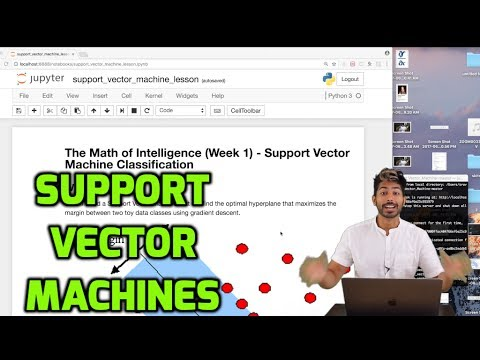

In [9]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('g8D5YL6cOSE',width=800, height=600)

***
***
## Python Implementation from Lab

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats          
import seaborn as sns; sns.set()                            # use seaborn plotting defaults
from sklearn.datasets.samples_generator import make_blobs   # for making randomized data
from sklearn.svm import SVC                                 # "Support Vector classifier"

### Making randomized dataset with [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

**Parameters:**
- `n_samples` : int or array-like, optional (default=100)
If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

- `n_features` : int, optional (default=2)
The number of features for each sample.

- `centers` : int or array of shape [n_centers, n_features], optional
(default=None) The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

- `cluster_std` : float or sequence of floats, optional (default=1.0)
The standard deviation of the clusters.

- `center_box` : pair of floats (min, max), optional (default=(-10.0, 10.0))
The bounding box for each cluster center when centers are generated at random.

- `shuffle` : boolean, optional (default=True)
Shuffle the samples.

- `random_state` : int, RandomState instance or None (default)
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. 

**Returns:**
- `X` : array of shape [n_samples, n_features]
The generated samples.

- `y` : array of shape [n_samples]
The integer labels for cluster membership of each sample.

#### Note that SVM is supervised, so it needs the class labels `y`



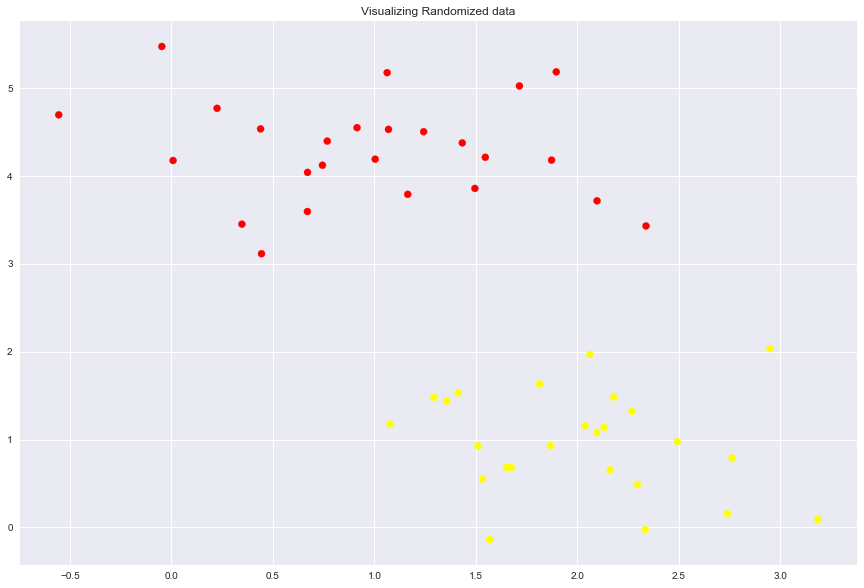

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)  

# plotting the data
plt.figure(figsize=(15,10))
plt.title('Visualizing Randomized data')
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plt.show()

***
### Guessing the hyperplane (boundary lines)
$y=mx+b$  
`yfit = m * xfit + b`

Code plots the black lines and `fill_between` of the following equations:
\begin{align} 
y&=x+0.5\\
y&=0.65x+1.6\\
y&=0.33x+0.55\\
\end{align}

**GOAL:** to find the best decision boundary (hyperplane) between two classes 


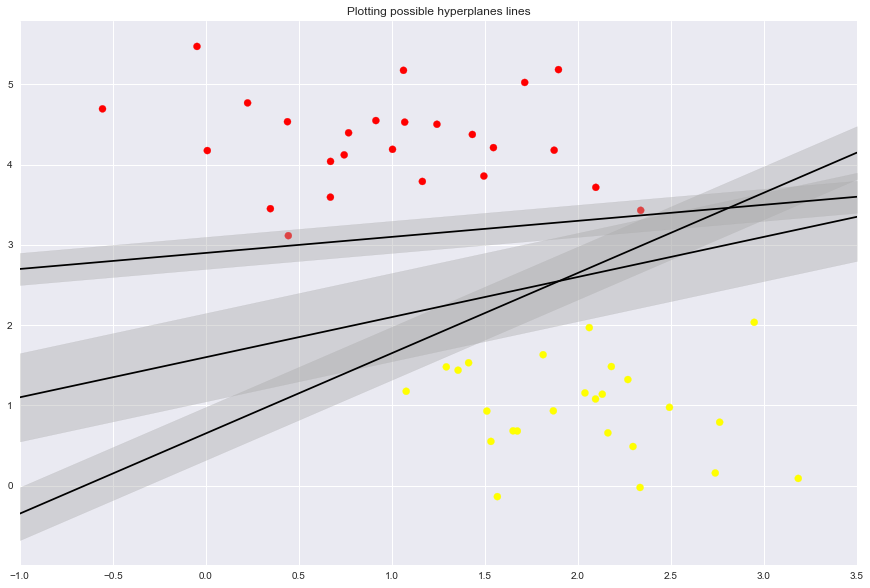

In [3]:
xfit = np.linspace(-1,3.5)   # makes np.array with 100 points starting at -1, ending at 3.5

plt.figure(figsize=(15,10))
plt.title('Plotting possible hyperplanes lines')
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

for m, b, d in [(1,0.65, 0.33), (0.5, 1.6, 0.55), (0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color = '#AAAAAA', alpha=0.4)

plt.xlim(-1,3.5)
plt.show()

In the plot above, we see three different, imperfect hyperplanes.  
Now we will run `sklearn.svm.SVC` and plot the actual hyperplane 

***
***
### Running `sklearn.svm.SVC`
#### Parameter
**kernel : string, optional (default=’rbf’)**  
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

#### Method
**fit(X, y, sample_weight=None)**  
Fit the SVM model according to the given training data.

**Parameters:	**
X : {array-like, sparse matrix}, shape (n_samples, n_features)  
Training vectors, where n_samples is the number of samples and n_features is the number of features. For kernel=”precomputed”, the expected shape of X is (n_samples, n_samples).

**y : array-like, shape (n_samples,)**  
Target values (class labels in classification, real numbers in regression)

**sample_weight : array-like, shape (n_samples,)**  
Per-sample weights. Rescale C per sample. Higher weights force the classifier to put more emphasis on these points.

**Returns:	**  
self : object

In [14]:
model = SVC(kernel='linear')
model.fit(X, y)

print('Support vectors for dataset: \n{}'.format(model.support_vectors_))
print('Predicting for an unknown given point: {}'.format(model.predict([[0.8, -1]])))

Support vectors for dataset: 
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
Predicting for an unknown given point: [1]


***
****
### Finding and plotting the correct hyperplane (decision function) created by `sklearn.svm.SVC`
We will superimpose the hyperplane as a solid line cutting through the scatter plot.  
The points touching the dashed lines are our support vectors


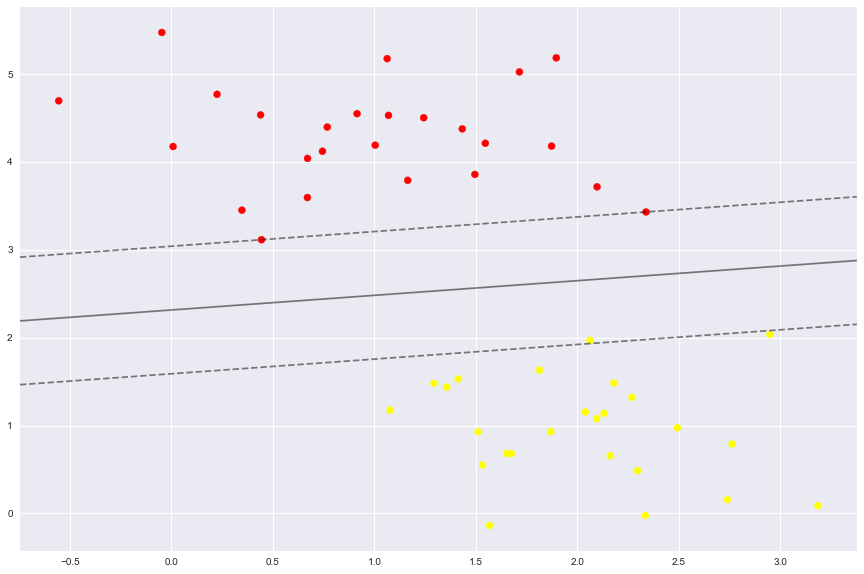

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    #Plot the decision function for a 2D SVC
    if ax is None:
        ax = plt.gca()   # get current axis if none was provided as a parameter
    xlim = ax.get_xlim() # the range of x values for axis
    ylim = ax.get_ylim() # the range of y values for axis
    
    #create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
#     print(X)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins 
    ax.contour(X, Y, P, colors = 'k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                   s=300, linewidth=1, facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

plt.figure(figsize=(15,10))
plt.title('Hyperplane denoted by the solid line in black')
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);
plt.show()